In [1]:
from hurst import compute_Hc
import matplotlib.pyplot as plt
from tqdm import tqdm
import datetime
import yfinance as yf

curr_date = datetime.datetime.now()

hursts = {}
tickers = open("../old/tickers/nasdaq-100.txt", "r").readlines()

for ticker in tqdm(tickers):
    df = yf.download(ticker, start=curr_date - datetime.timedelta(days=59), end=curr_date, interval="5m")
    if df is None or df.empty:
        continue

    # compute rolling hurst
    df["H"] = df["Adj Close"].rolling(400).apply(lambda x: compute_Hc(x, kind="price", simplified=True)[0], raw=True)

    # smooth hurst
    df["H"] = df["H"].rolling(10).mean()
    df["H"] = df["H"].fillna(method="ffill")

    hursts[ticker] = df["H"].iloc[-1]

In [196]:
# sort by hurst
hursts = {k: v for k, v in sorted(hursts.items(), key=lambda item: item[1])}

print("Top 5 most mean reverting stocks:")
for i, (k, v) in enumerate(hursts.items()):
    if i >= 5:
        break
    print(f"{k}: {v}")

print("Top 5 most trending stocks:")
for i, (k, v) in enumerate(hursts.items()):
    if i < len(hursts) - 5:
        continue
    print(f"{k}: {v}")

Top 5 most mean reverting stocks:
ENPH
: 0.3249044759212617
COST
: 0.33002416611336205
SGEN
: 0.33718354179430793
CHTR
: 0.3792367609297735
NFLX
: 0.4006730754876073
Top 5 most trending stocks:
BKR
: 0.6505628861211027
BKNG
: 0.6576466275033714
WBD
: 0.7073011710459103
MAR
: 0.7123516123464009
PCAR
: 0.7457991253236466


[*********************100%***********************]  1 of 1 completed


<Axes: xlabel='Datetime'>

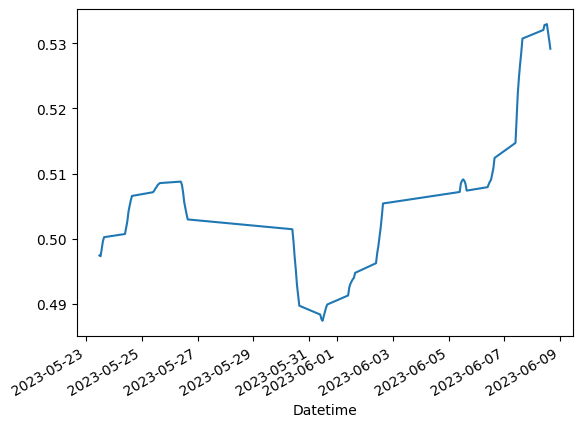

In [6]:
ticker = "MAR"
df = yf.download(ticker, start=curr_date - datetime.timedelta(days=100), end=curr_date, interval="1h")
df["H"] = df["Adj Close"].rolling(400).apply(lambda x: compute_Hc(x, kind="price", simplified=True)[0], raw=True)
df["H"] = df["H"].rolling(10).mean()
df["H"] = df["H"].fillna(method="ffill")

df["H"].plot()